In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pylab as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

np.set_printoptions(precision=3, linewidth=150, suppress=True)
plt.style.use(['seaborn-whitegrid','data/cours.mplstyle'])

Dans ce cours on regarde 2 points :
    
* comment améliorer Jacobi
* la convergence des algorithmes itératifs (comment la comprendre et bien l'exploiter)

In this course we look at 2 points:
    
* how to improve Jacobi
* the convergence of iterative algorithms (how to understand it and exploit it well)

## Ajouter de l'inertie à Jacobi

La méthode de Jacobi mène au système itératif suivant

$$
{\bf x}^{k+1} = M^{-1} \, ( N\; {\bf x}^k + {\bf b})
$$

On a vu que cette méthode ne converge que si la matrice B a son rayon spectral inférieur à 1, $\rho(M^{-1}\,N) < 1$.

On peut modifier cette méthode pour qu'elle ait un plus grand rayon de convergence
et donc converge pour plus de matrices. Pour cela on ajoute de l'inertie :

$$
{\bf x}^{k+1} =  w \, M^{-1} \, (N\; {\bf x}^k + {\bf b}) + (1-w) \, {\bf x}^k
$$

avec $0 < w \le 1$.

Si $w = 1$ alors on a Jacobi classique et si $w = 0$ alors on ne bouge pas, ${\bf x}^{k+1} = {\bf x}^k$.

On parle d'inertie car on voit qu'on avance moins vite puisque la nouvelle valeur de ${\bf x}^{k+1}$
est comprise entre l'ancienne  valeur de ${\bf x}^{k+1}$ et ${\bf x}^k$.


Note : $w \, {\bf a} + (1-w) \, {\bf b}$ représente le segment $[{\bf b}, {\bf a}]$ lorsque $w$ varie entre 0 et 1.

L'idée est qu'avec l'intertie on va peut-être entre dans la zone de convergence alors que sans on aurait sauté
par dessus.

Cette méthode s'appelle la **surrelaxation** (*over-relaxation* en anglais), je ne sais pas pourquoi.

## Add inertia to Jacobi

Jacobi's method leads to the following iterative system

$$
{\bf x}^{k+1} = M^{-1} \, ( N\; {\bf x}^k + {\bf b})
$$

We have seen that this method only converges if the matrix B has its spectral radius less than 1, $\rho(M^{-1}\,N) < 1$.

We can modify this method so that it has a greater radius of convergence
and therefore converges for more matrices. For this we add inertia:

$$
{\bf x}^{k+1} =  w \, M^{-1} \, (N\; {\bf x}^k + {\bf b}) + (1-w) \, {\bf x}^k
$$

with $0 < w \le 1$.

If $w = 1$ then we have classic Jacobi and if $w = 0$ then we don't move, ${\bf x}^{k+1} = {\bf x}^k$.

We talk about inertia because we see that we are moving more slowly since the new value of ${\bf x}^{k+1}$
is between the old value of ${\bf x}^{k+1}$ and ${\bf x}^k$.


Note: $w \, {\bf a} + (1-w) \, {\bf b}$ represents segment $[{\bf b}, {\bf a}]$ when $w$ varies between 0 and 1.

The idea is that with inertia we may enter the convergence zone whereas without it we would have jumped
Above.

This method is called *over-relaxation*, I don't know why.

### Programmons l'inertie pour Jacobi

On commence par un Jacobi simple pour vérifier qu'on diverge.

### Let's program inertia for Jacobi

We start with a simple Jacobi to check that we diverge.

In [2]:
np.random.seed(799)

A = np.random.randint(10, size=(4,4))
b = A.sum(axis=1)                     # ainsi la solution est [1,1,1,1]
print('A:\n', A, "\nb:\n", b, "\n")

M = np.diag(A)        # attention, c'est un vecteur
N = np.diag(M) - A    # np.diag d'une matrice donne un vecteur, np.diag d'un vecteur donne une matrice
print(f"M:\n {np.diag(M)}\nN:\n {N}\n")

x0 = np.random.random(4)
x = x0
for i in range(20):
    print(f"x_{i} = {x}")
    x = (N @ x + b) / M

A:
 [[5 7 6 0]
 [1 7 2 5]
 [5 6 5 1]
 [0 6 3 7]] 
b:
 [18 15 17 16] 

M:
 [[5 0 0 0]
 [0 7 0 0]
 [0 0 5 0]
 [0 0 0 7]]
N:
 [[ 0 -7 -6  0]
 [-1  0 -2 -5]
 [-5 -6  0 -1]
 [ 0 -6 -3  0]]

x_0 = [0.062 0.652 0.185 0.852]
x_1 = [2.465 1.472 2.384 1.647]
x_2 = [-1.322 -0.067 -1.161  0.002]
x_3 = [5.088 2.662 4.803 2.841]
x_4 = [-5.89  -1.986 -5.451 -2.055]
x_5 = [12.921  6.009 12.084  6.324]
x_6 = [-19.314  -7.672 -17.997  -8.044]
x_7 = [35.937 15.79  33.53  16.575]
x_8 = [-58.741 -24.41  -54.8   -25.618]
x_9 = [103.534  44.49   96.557  46.694]
x_10 = [-174.554  -73.588 -162.861  -77.23 ]
x_11 = [302.056 128.775 281.706 135.159]
x_12 = [-514.732 -218.038 -480.218 -228.824]
x_13 = [885.114 376.327 825.542 394.983]
x_14 = [-1513.908  -642.302 -1412.303  -674.084]
x_15 = [2597.587 1103.419 2422.887 1158.103]
x_16 = [-4448.651 -1888.411 -4149.91  -1981.882]
x_17 = [7627.267 3238.983 7114.521 3399.456]
x_18 = [-13068.402  -5548.37  -12190.539  -5823.066]
x_19 = [22399.965  9511.401 20894.459  998

Ajoutons maintenant l'inertie à Jacobi :

Now let's add inertia to Jacobi:

In [3]:
x = x0    # on reprend la même valeur initiale sinon la comparaison serait faussée
w = 0.5   # on choisit w 
for i in range(20):
    print(f"x_{i} = {x}")
    x = w * (N @ x + b) / M + (1-w) * x

x_0 = [0.062 0.652 0.185 0.852]
x_1 = [1.264 1.062 1.284 1.25 ]
x_2 = [0.918 0.882 0.948 1.037]
x_3 = [1.072 0.941 1.082 1.08 ]
x_4 = [1.028 0.925 1.032 1.048]
x_5 = [1.047 0.939 1.042 1.049]
x_6 = [1.041 0.943 1.029 1.042]
x_7 = [1.043 0.949 1.024 1.039]
x_8 = [1.042 0.954 1.017 1.036]
x_9 = [1.043 0.959 1.011 1.034]
x_10 = [1.044 0.962 1.005 1.032]
x_11 = [1.045 0.966 1.    1.031]
x_12 = [1.046 0.969 0.995 1.03 ]
x_13 = [1.048 0.971 0.99  1.03 ]
x_14 = [1.05  0.973 0.986 1.029]
x_15 = [1.053 0.974 0.981 1.029]
x_16 = [1.056 0.976 0.977 1.03 ]
x_17 = [1.059 0.977 0.972 1.03 ]
x_18 = [1.063 0.977 0.968 1.031]
x_19 = [1.067 0.978 0.963 1.032]


La solution recherchée étant [1,1,1,1] ca semble bien marcher !


The sought solution being [1,1,1,1] it seems to work well!

### Étudions la convergence

Pour bien comprendre une méthode itérative il faut étudier sa convergence et donc tracer une courbe
de l'erreur absolue (lorsqu'on connait la solution), ou de l'erreur relative (entre 2 ${\bf x}^i$ successifs)
ou du résidu ($||A \, {\bf x}^i - {\bf b}||$) ou de toute autre mesure qui a du sens.

Regardons :

### Let's study convergence

To fully understand an iterative method, it is necessary to study its convergence and therefore draw a curve
absolute error (when the solution is known), or relative error (between 2 successive ${\bf x}^i$)
or the residual ($||A \, {\bf x}^i - {\bf b}||$) or any other measure that makes sense.

Let's look:

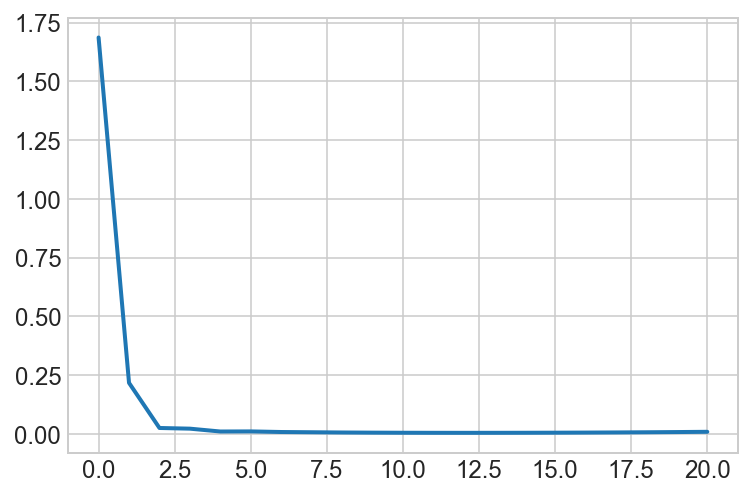

In [4]:
x = x0    # on reprend la même valeur initiale sinon la comparaison serait faussée
w = 0.5   # on choisit w 
error = [np.square(x - np.ones(4)).sum()]
for i in range(20):
    x = w * (N @ x + b) / M + (1-w) * x
    error.append(np.square(x - np.ones(4)).sum())
plt.plot(range(len(error)), error);

A priori cela semble bien, sauf qu'en fait on ne voit rien car l'échelle empêche de voir ce qui se passe à
la fin.

Regardons en échelle logarithmique :

A priori it seems good, except that in fact you can't see anything because the scale prevents you from seeing what is happening at
the end.

Let's look at a logarithmic scale:

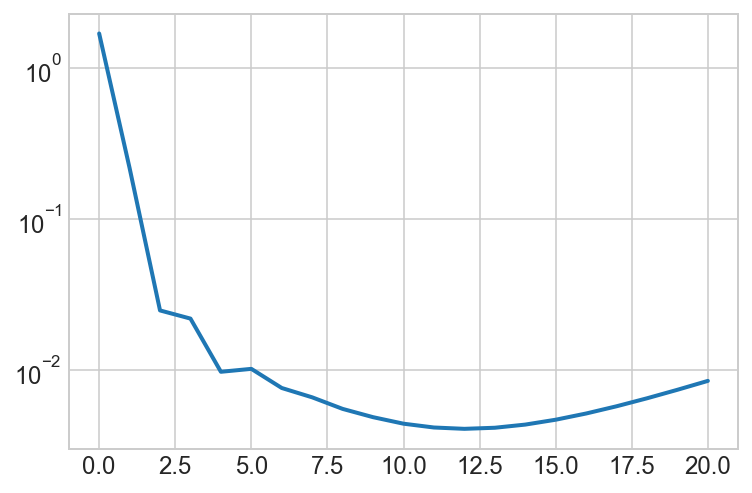

In [5]:
plt.plot(range(len(error)), error)
plt.semilogy();

Oula, la fin fait peur...

Moralité : **Il faut toujours regarder une erreur en échelle logarithmique.** 

Puiqu'on mesure quelque chose 
qui doit tendre vers 0, avec une echelle normale on est vite écrasé et donc on ne voit pas si on est à 
$10^{-3}$ ou $10^{-6}$ alors que c'est très très différent.

De même si on diverge on ne verra pas le début car un échelle linéraire s'ajustera sur les dernières valeurs qui 
peuvent être très grandes.

Wow, the ending is scary...

Morality: **Always look at an error in logarithmic scale.**

Since we measure something
which must tend towards 0, with a normal scale we are quickly crushed and therefore we do not see if we are at
$10^{-3}$ or $10^{-6}$ while it is very very different.

Similarly if we diverge we will not see the beginning because a linear scale will adjust to the last values ​​which
can be very large.

Reprenons notre calcul sur plus d'itérations.

Let us resume our calculation on more iterations.

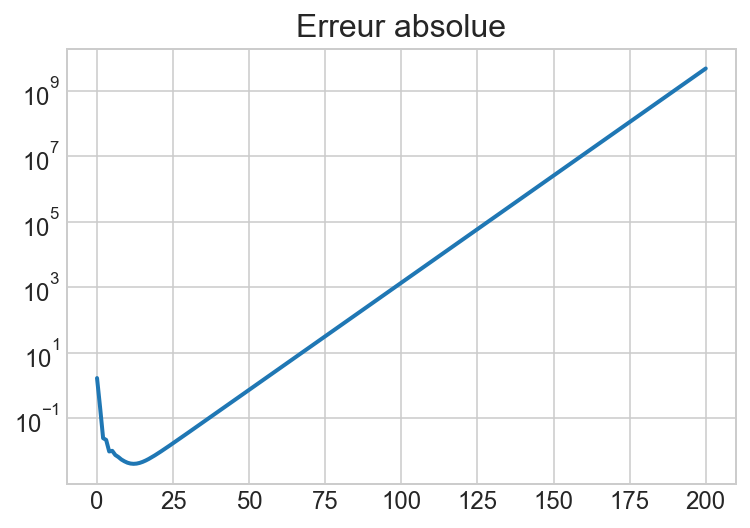

In [6]:
x = x0    # on reprend la même valeur initiale sinon la comparaison serait faussée
w = 0.5   # on choisit w 
error = [np.square(x - np.ones(4)).sum()]
for i in range(200):
    x = w * (N @ x + b) / M + (1-w) * x
    error.append(np.square(x - np.ones(4)).sum())
plt.plot(range(len(error)), error)
plt.title('Erreur absolue')
plt.semilogy();

Donc on s'est approché de la solution puis on a divergé ce qui est mieux que de diverger directement.

#### Erreur relative 

Aurait-on pu le voir si on n'avait pas connu la solution ? Regardons l'écart entre 2 ${\bf x}^k$ successifs.

So we approached the solution and then we diverged, which is better than diverging directly.

#### Relative error

Could we have seen it if we had not known the solution? Let's look at the gap between 2 successive ${\bf x}^k$s.

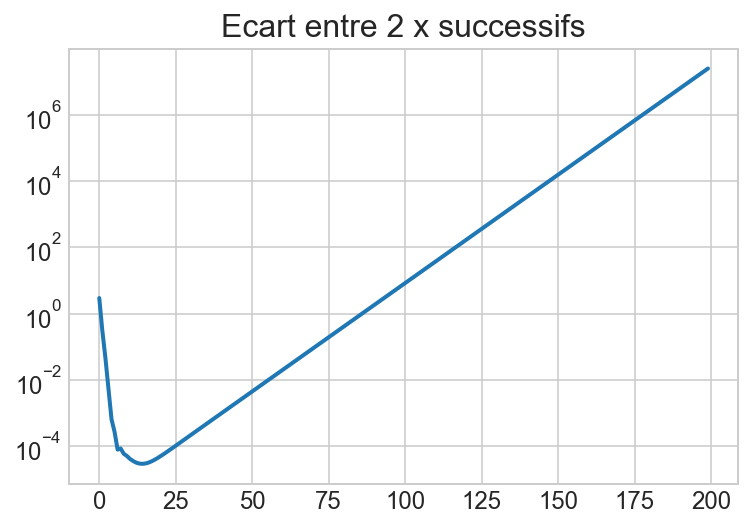

In [7]:
x = x0    # on reprend la même valeur initiale sinon la comparaison serait faussée
w = 0.5   # on choisit w 
error2 = []
for i in range(200):
    old_x = x
    x = w * (N @ x + b) / M + (1-w) * x
    error2.append(np.square(x - old_x).sum())
plt.plot(range(len(error2)), error2)
plt.title('Ecart entre 2 x successifs')
plt.semilogy();

Il semble bien qu'il y ait une relation forte entre l'écart entre deux **x** successif et l'erreur absolue.
Vérifions :

It seems that there is a strong relationship between the gap between two successive **x** and the absolute error.
Let's check:

In [8]:
k_min = np.argmin(error)
k2_min = np.argmin(error2)
print('Itération présentant le minimum : ', k_min, k2_min)
print('Erreur absolue minimum                                        : ', min(error))
print("Erreur absolue minimum devinée à partir du minimum de l'écart : ", error[k2_min])

Itération présentant le minimum :  12 14
Erreur absolue minimum                                        :  0.004062676542953207
Erreur absolue minimum devinée à partir du minimum de l'écart :  0.004333899458825818


L'écart entre 2 **x** successifs est une facon simple et relativement efficace de savoir quand arrêter un algorithme
itératif.

The gap between 2 successive **x** is a simple and relatively efficient way to know when to stop an algorithm
iterative.

#### Résidu

Enfin on peut calculer le résidu à savoir $||A \, {\bf x} - {\bf b}||$ mais c'est $n^2$ opérations :

#### Residue

Finally we can calculate the residue namely $||A \, {\bf x} - {\bf b}||$ but it is $n^2$ operations:

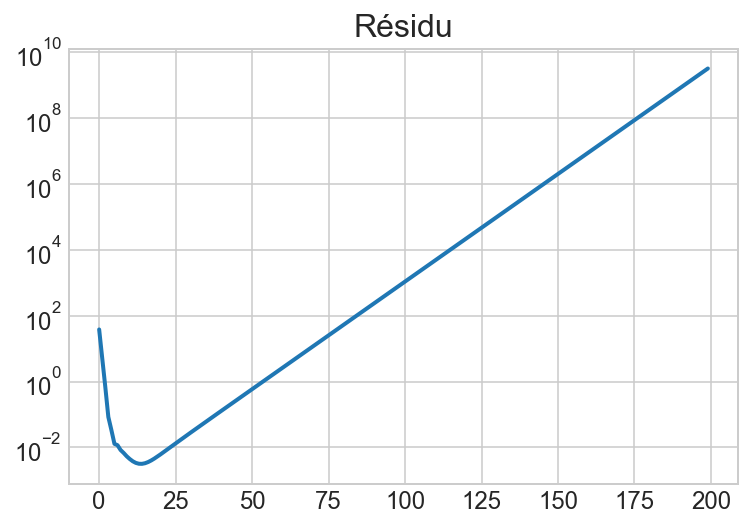

In [9]:
x = x0    # on reprend la même valeur initiale sinon la comparaison serait faussée
w = 0.5   # on choisit w 
residu = []
for i in range(200):
    old_x = x
    x = w * (N @ x + b) / M + (1-w) * x
    residu.append(np.square(A @ x - b).sum())
plt.plot(range(len(residu)), residu)
plt.title('Résidu')
plt.semilogy();

### Testons d'autres matrices avec cet algorithme



### Let's test other matrices with this algorithm

In [10]:
def mk_A(seed):
    np.random.seed(seed)
    return np.random.randint(10, size=(4,4))

A = mk_A(234)
b = A.sum(axis=1)                    

M = np.diag(A)    
N = np.diag(M) - A 

x0 = np.random.random(4)

In [11]:
def plot_error(M, N, b, x0, w, n=200):
    x = x0 
    error = [np.square(x - np.ones(4)).sum()]
    error2 = []
    for i in range(n):
        old_x = x
        x = w * (N @ x + b) / M + (1-w) * x
        error.append(np.square(x - np.ones(4)).sum())
        error2.append(np.square(x - old_x).sum())
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
    ax1.plot(range(len(error)), error)
    ax1.set_title('Erreur absolue')
    ax1.semilogy();
    ax2.plot(range(len(error2)), error2)
    ax2.set_title('Erreur relative')
    ax2.semilogy()
    print("Itération du minimum :",np.argmin(error), np.argmin(error2))

Itération du minimum : 17 40


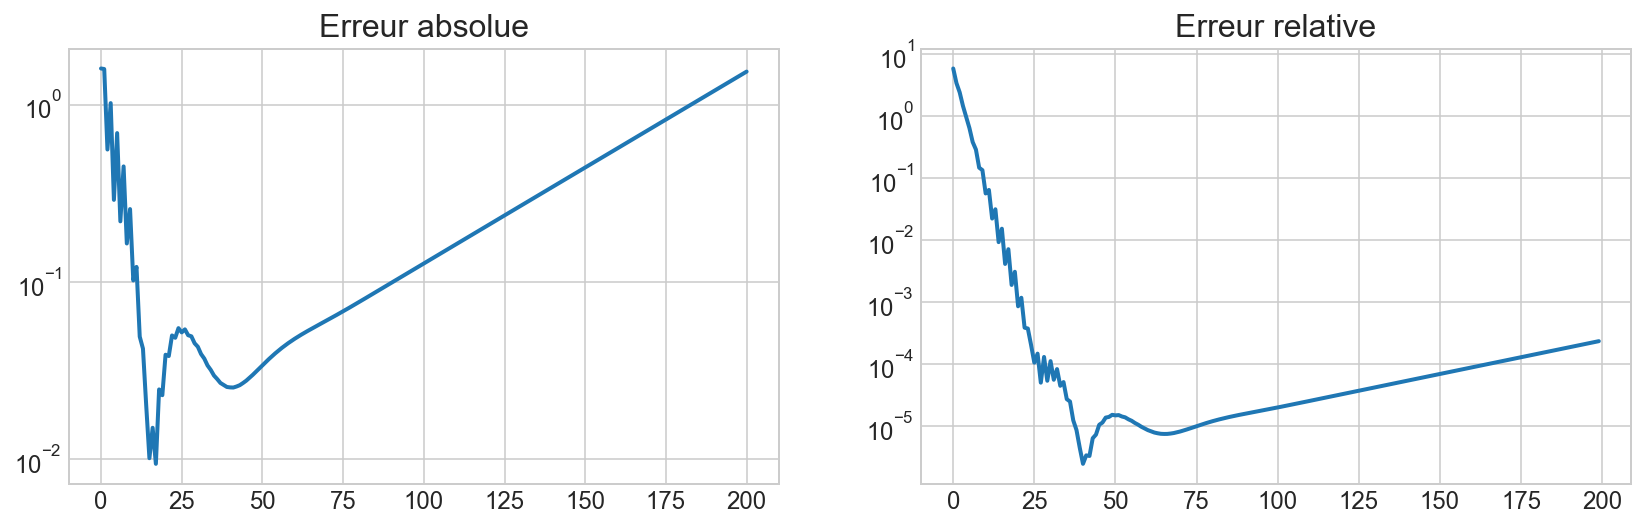

In [12]:
plot_error(M, N, b, x0, w=0.5);

On retrouve le même comportement (convergence puis divergence) mais en nettement plus cahotique.

On peut réduire les oscillation en augmentant l'inertie c.a.d. en diminuant $w$ :

We find the same behavior (convergence then divergence) but much more chaotic.

We can reduce the oscillations by increasing the inertia, i.e. by decreasing $w$:

Itération du minimum : 81 209


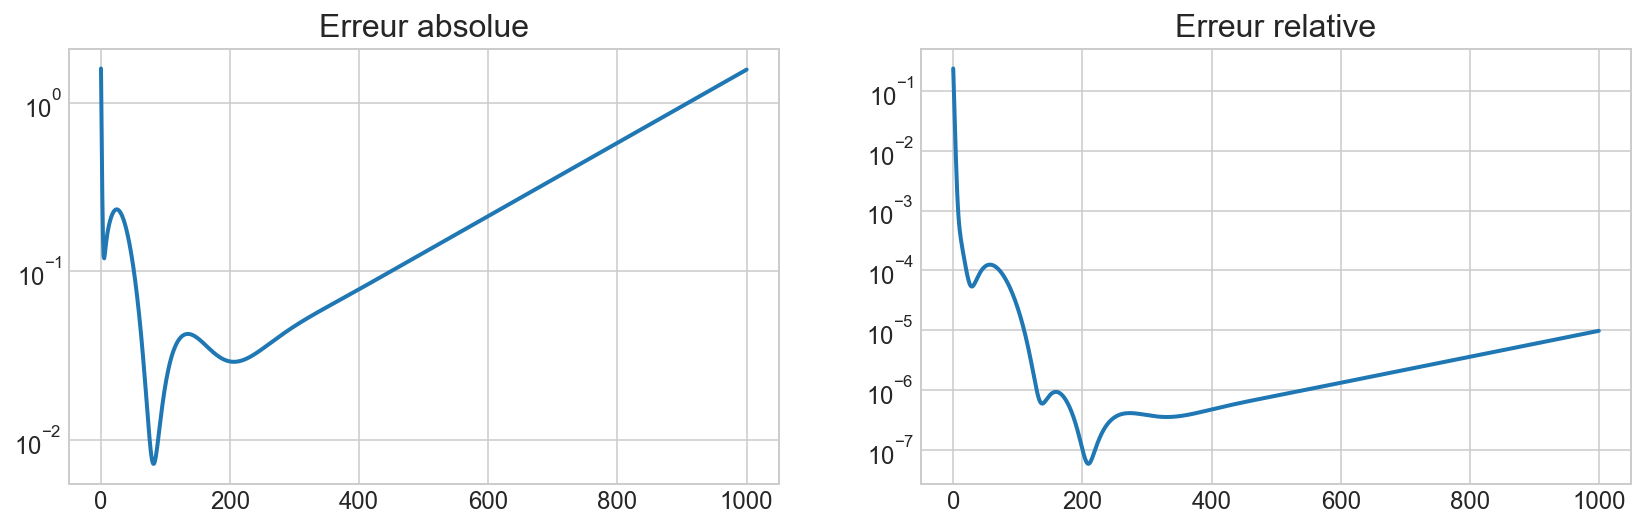

In [13]:
error2 = plot_error(M, N, b, x0, w=0.1, n=1000) 
# w 5 fois plus petit donc je fais 5 fois plus d'itération pour "avancer" d'autant (grosso modo)

Les oscillations ont disparu ! Mais on a payé le prix fort puisqu'on a du faire 5 fois plus d'itérations.

On constate que dans les 2 cas l'erreur relative (entre 2 x successifs) ne donne pas le bon minumum.
Donc arrêter un algorithme itératif en fonction de l'erreur relative n'est pas toujours le plus efficace.

Regardons ce que donne le résidu :

The oscillations are gone! But we paid a high price since we had to do 5 times more iterations.

It can be seen that in both cases the relative error (between 2 successive x) does not give the correct minimum.
So stopping an iterative algorithm based on relative error is not always the most efficient.

Let's see what the residue gives:

Itération du minimum : 218


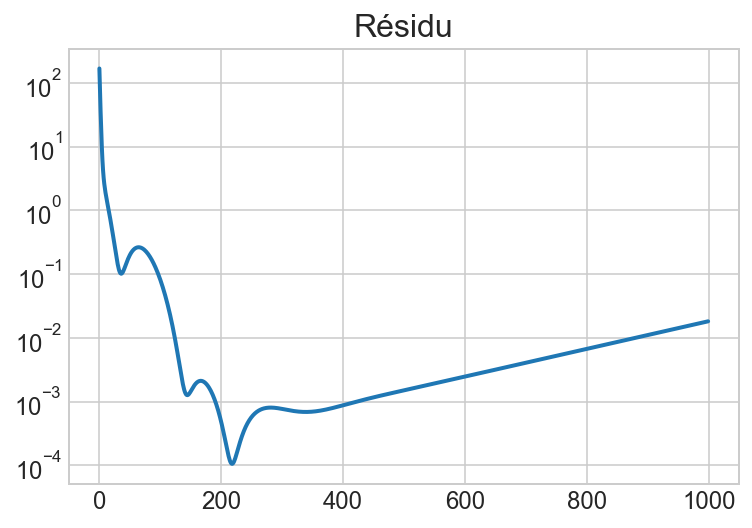

In [14]:
x = x0 
w = 0.1
residu = []
for i in range(1000):
    x = w * (N @ x + b) / M + (1-w) * x
    residu.append(np.square(A @ x - b).sum())
plt.plot(range(len(residu)), residu)
plt.title('Résidu')
plt.semilogy();
print("Itération du minimum :", np.argmin(residu))

### Exercice 20.1

Comment se fait-il que la courbe du résidu ait la même forme que celle de l'erreur relative ?

### Exercise 20.1

How is it that the curve of the residual has the same shape as that of the relative error?

**Réponse**

...

#### Nouvelle matrice

#### New Matrix

Itération du minimum : 153 153


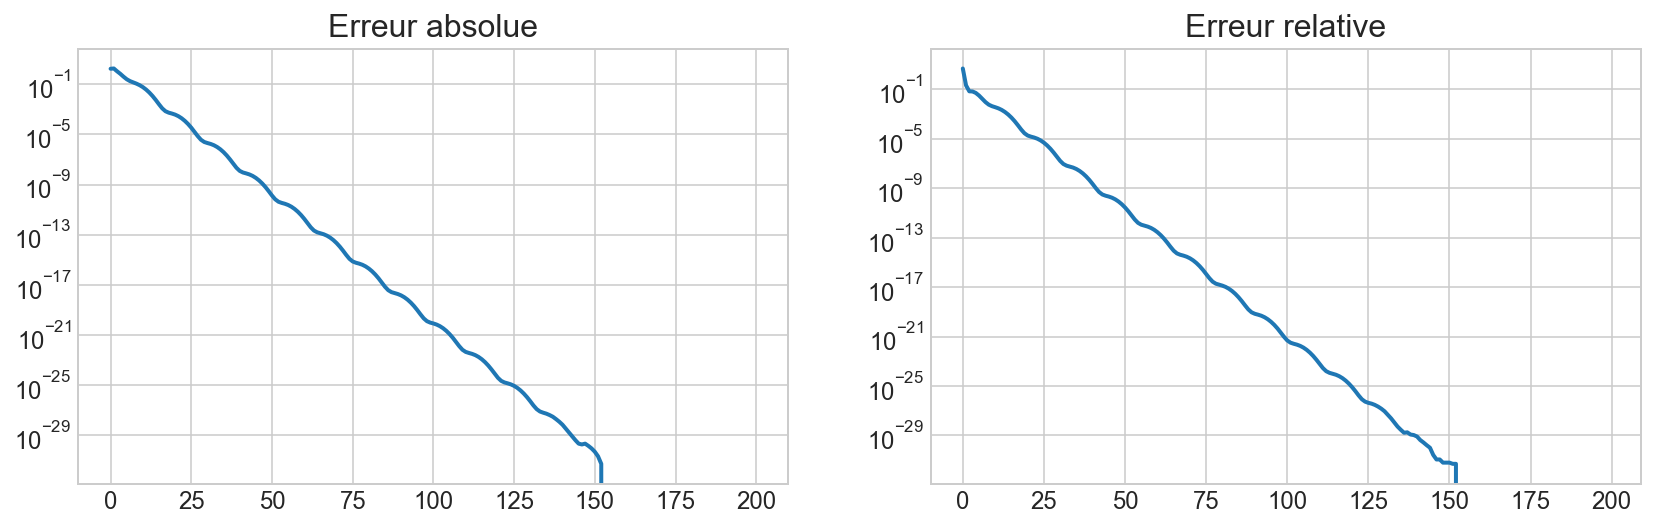

In [15]:
A = mk_A(123)
b = A.sum(axis=1)                    

M = np.diag(A)    
N = np.diag(M) - A 

x0 = np.random.random(4)

plot_error(M, N, b, x0, w=0.5)

Voici un cas avec une convergence parfaite. Notons qu'on s'est arrêté à l'itération 150 lorsqu'on est passé
en dessous de la précision de la machine (les valeurs suivantes devant être 0 et comme log(0) = $-\infty$,
matplolib ne les affiche pas).

Vérifions quand même que la méthode de Jacobi de base n'aurait 
pas marché :

Here is a case with perfect convergence. Note that we stopped at iteration 150 when we passed
below machine precision (following values ​​must be 0 and as log(0) = $-\infty$,
matplolib does not display them).

Let us nevertheless verify that the basic Jacobi method would not have
it does not work :

In [16]:
x = x0
for i in range(20):
    print(f"x_{i} = {x}")
    x = (N @ x + b) / M

x_0 = [0.398 0.738 0.182 0.175]
x_1 = [4.127 1.837 1.029 2.203]
x_2 = [-0.526 -0.195  0.907 -0.906]
x_3 = [3.427 1.782 1.133 3.759]
x_4 = [-1.56  -0.204  0.913 -0.86 ]
x_5 = [3.395 2.118 1.134 3.775]
x_6 = [-1.907 -0.196  0.876 -1.616]
x_7 = [3.877 2.342 1.133 3.784]
x_8 = [-2.133 -0.357  0.851 -2.12 ]
x_9 = [4.364 2.49  1.151 4.165]
x_10 = [-2.525 -0.574  0.834 -2.467]
x_11 = [4.804 2.671 1.175 4.665]
x_12 = [-3.027 -0.792  0.814 -2.89 ]
x_13 = [5.293 2.898 1.199 5.17 ]
x_14 = [-3.581 -1.027  0.789 -3.421]
x_15 = [5.87  3.159 1.225 5.719]
x_16 = [-4.194 -1.298  0.76  -4.026]
x_17 = [6.531 3.45  1.255 6.35 ]
x_18 = [-4.891 -1.608  0.728 -4.704]
x_19 = [7.277 3.779 1.29  7.073]


Jacobi de base diverge, donc c'est bien l'inertie qui a permis de converger.

The basic Jacobi diverges, so it is indeed inertia that made it possible to converge.

#### Nouvelle matrice

#### New Matrix

Itération du minimum : 0 0


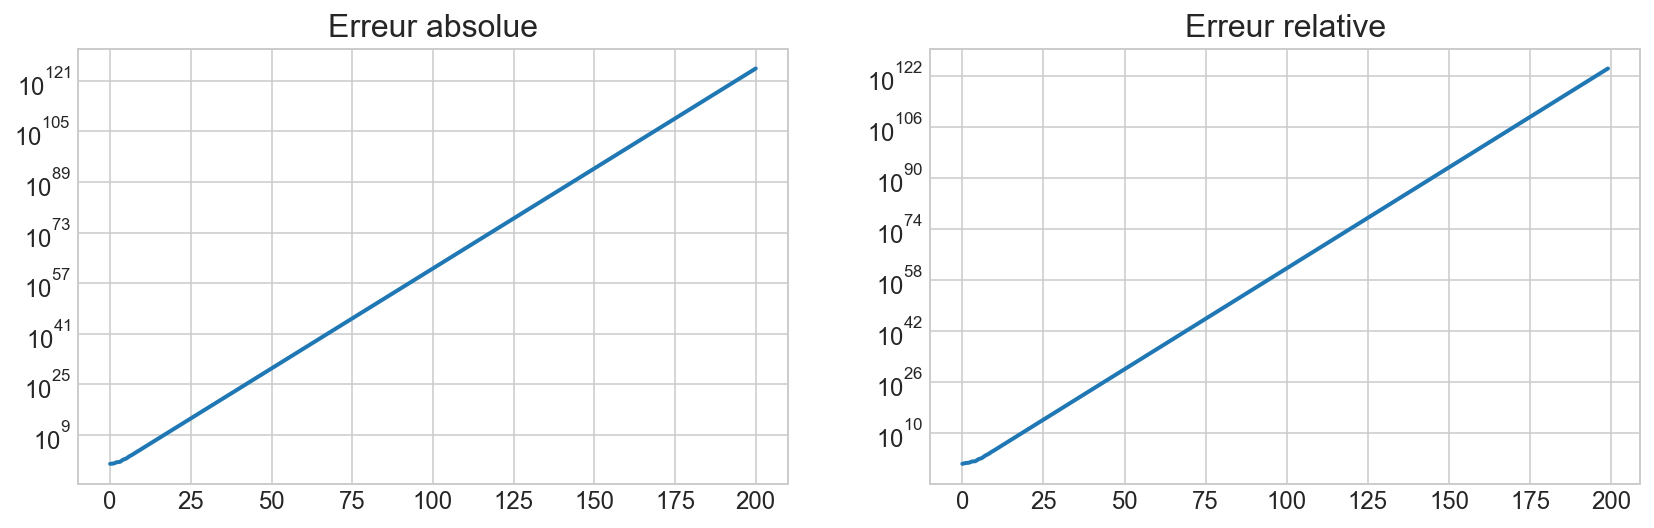

In [17]:
A = mk_A(16)
b = A.sum(axis=1)                    

M = np.diag(A)    
N = np.diag(M) - A 

x0 = np.random.random(4)

plot_error(M, N, b, x0, w=0.5)

Divergence directe mais si on baise $w$ on constate qu'on est dans le 1er cas :

Direct divergence but if we reduce $w$ we see that we are in the 1st case:

Itération du minimum : 32 38


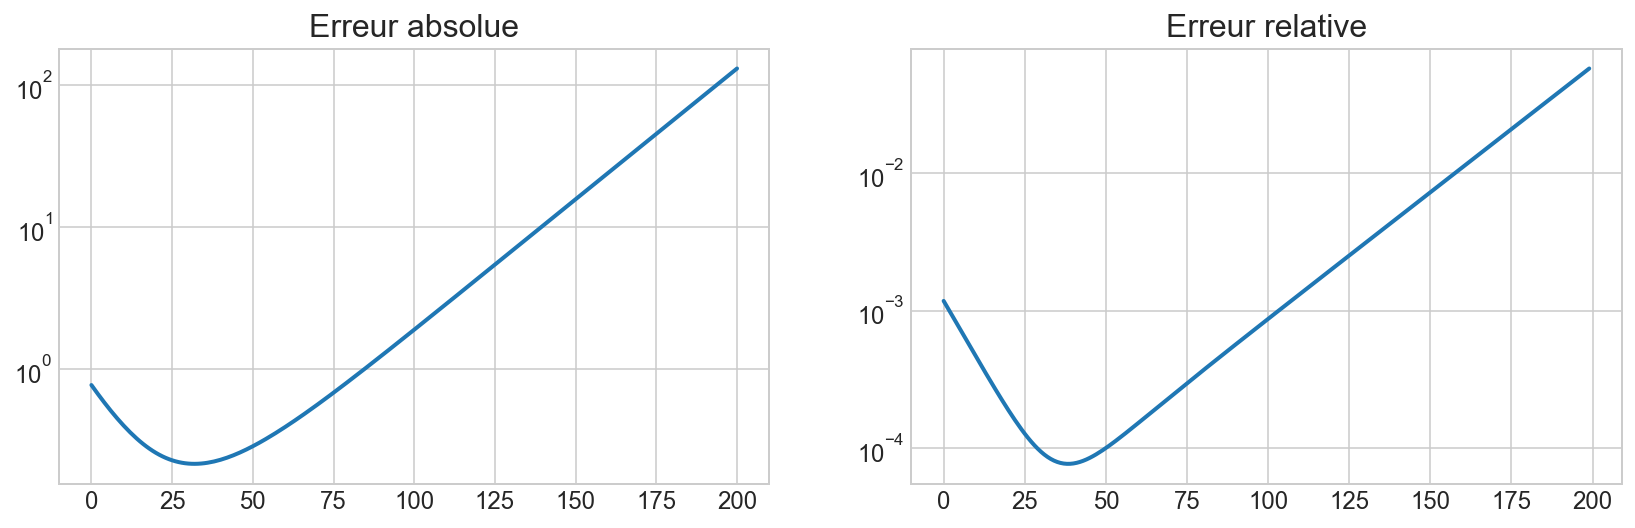

In [18]:
plot_error(M, N, b, x0, w=0.01)

Mais ca reste pas terrible. Au mieux on n'est même pas à $10^{-1}$.

But it's still not good. At best we are not even at $10^{-1}$.

## Normaliser

Cette dernière remarque n'a de sens que si on sait à quoi on se compare. 

* Si la solution cherchée est un milliard, avoir une erreur de 0.1 est très bien.
* Si la solution cherchée est 0.01, une erreur de 0.1 est énorme.

On ne peut donc juger une erreur qu'en fonction d'une référence. Si on connais la solution exacte, alors 
elle est la bonne référence.

$$
\frac{||{\bf x}^k - {\bf x}||}{||{\bf x}||}
$$

De même l'erreur entre 2 itérations successives n'a de sens que normalisée.
Si $||{\bf x}^k|| = 1 000 000$ alors $||{\bf x}^k - {\bf x}^{k-1}|| = 1$ est bien mais ce n'est pas le cas
si $||{\bf x}^k|| = 1$.

Aussi on compare la différence entre 2 itérations avec le **x** courant ou le précédant :

$$
\frac{||{\bf x}^{k+1} - {\bf x}^k||}{||{\bf x}^k||}
$$

Faisons le et regardons nos résultats précédents.

## Normalize

This last remark only makes sense if we know what we are comparing to.

* If the solution is a billion, having an error of 0.1 is fine.
* If the solution is 0.01, an error of 0.1 is huge.

We can therefore only judge an error according to a reference. If we know the exact solution, then
it is the right reference.

$$
\frac{||{\bf x}^k - {\bf x}||}{||{\bf x}||}
$$

Similarly, the error between 2 successive iterations only makes sense when normalized.
If $||{\bf x}^k|| = 1 000 000$ then $||{\bf x}^k - {\bf x}^{k-1}|| = 1$ is fine but it is not
if $||{\bf x}^k|| = 1$.

Also we compare the difference between 2 iterations with the current **x** or the previous one:

$$
\frac{||{\bf x}^{k+1} - {\bf x}^k||}{||{\bf x}^k||}
$$

Let's do that and look at our previous results.

In [19]:
def plot_error_normalized(M, N, b, x0, w, n=200):
    x = x0 
    error = [np.square(x - np.ones(4)).sum()]
    error2 = []
    for i in range(n):
        old_x = x
        x = w * (N @ x + b) / M + (1-w) * x
        error.append((np.square(x - np.ones(4)).sum())/4)               # normalisé par rapport à la solution
        error2.append((np.square(x - old_x).sum())/np.square(x).sum())  # normalisé par rapport à x
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
    ax1.plot(range(len(error)), error)
    ax1.set_title('Erreur absolue normalisée')
    ax1.semilogy();
    ax2.plot(range(len(error2)), error2)
    ax2.set_title('Erreur relative normalisée')
    ax2.semilogy()
    print("Itération du minimum :",np.argmin(error), np.argmin(error2))

Itération du minimum : 60 70


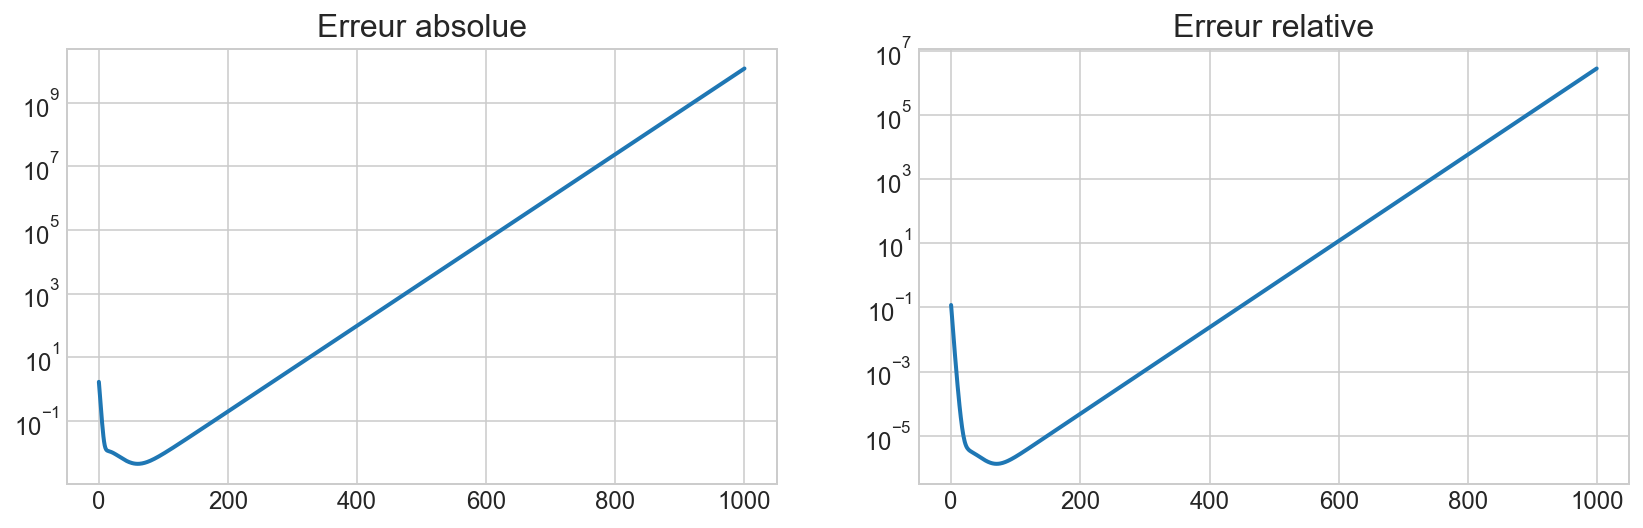

In [20]:
A = mk_A(799)
b = A.sum(axis=1)                    

M = np.diag(A)    
N = np.diag(M) - A 

x0 = np.random.random(4)
plot_error(M, N, b, x0, w=0.1, n=1000) 

Itération du minimum : 60 70


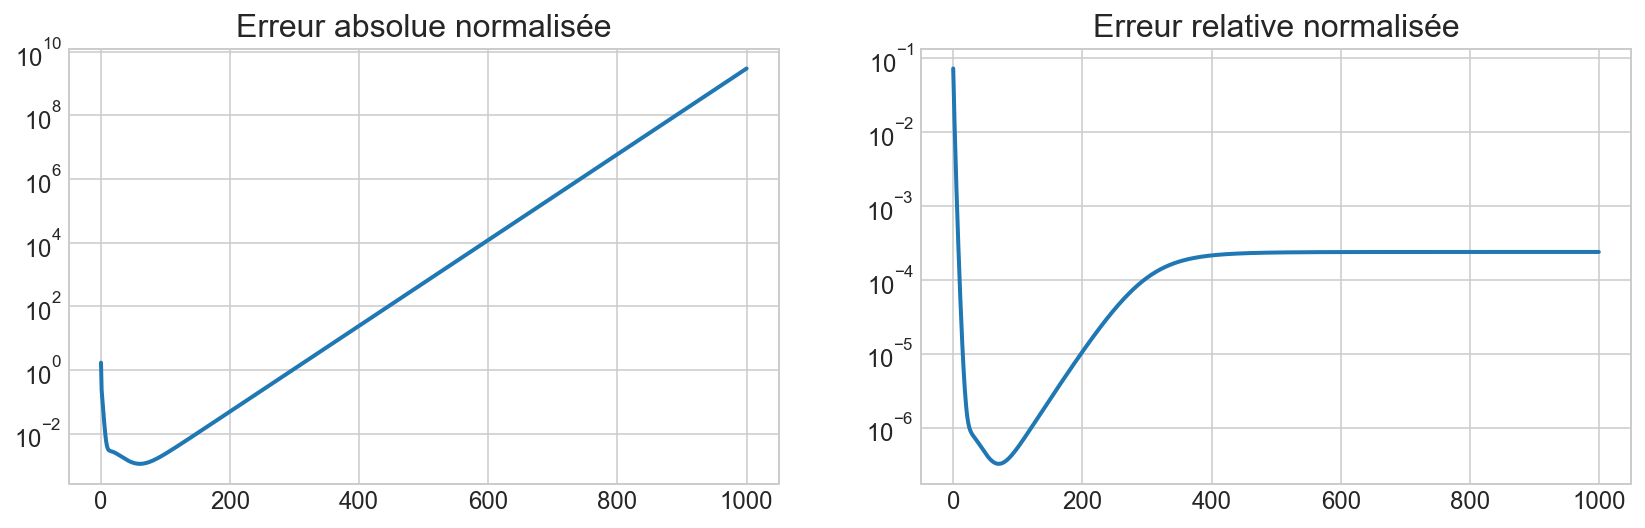

In [21]:
plot_error_normalized(M, N, b, x0, w=0.1, n=1000) 

Et oui, l'erreur relative normalisée se stabilise dans ce cas alors que non normalisée elle augmentait toujours.

Cela étant pour converger l'ecart entre 2 itérations doit tendre vers 0.

Parfois on peut avoir une surprise :

The normalized relative error stabilizes in this case whereas unnormalized it always increased.

However, to converge the gap between 2 iterations must tend to 0.

Sometimes we can have a surprise:

Itération du minimum : 500 499


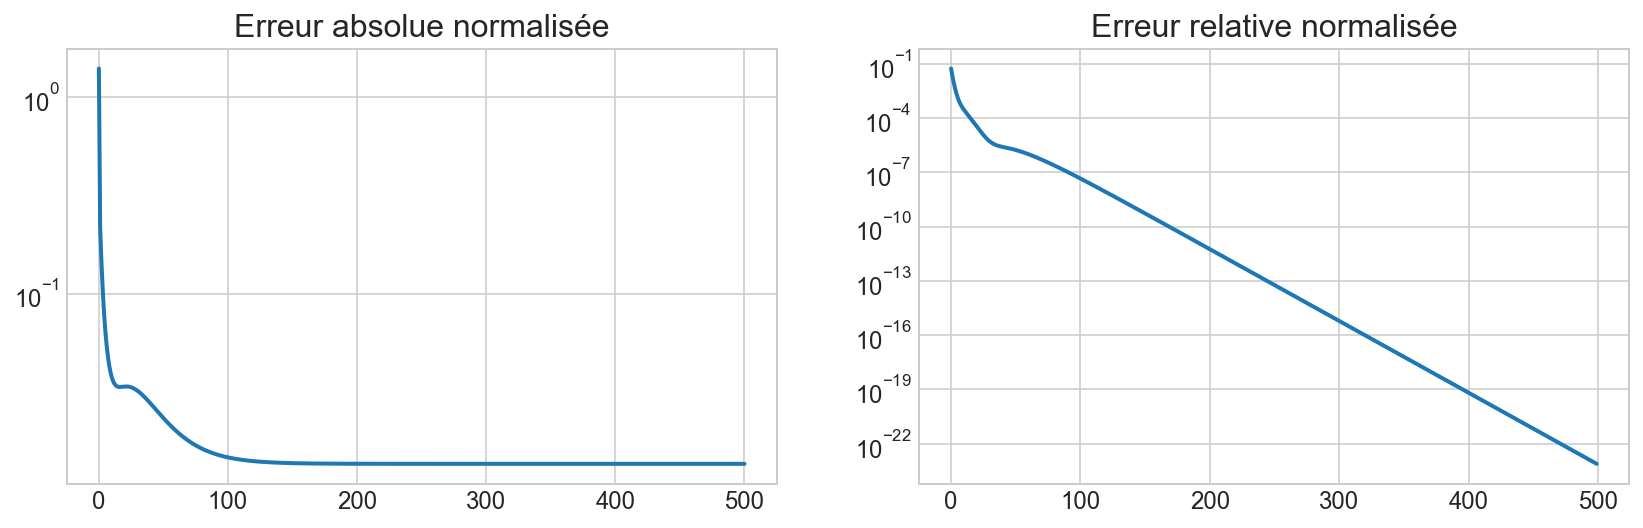

In [22]:
A = mk_A(308)
b = A.sum(axis=1)                    

M = np.diag(A)    
N = np.diag(M) - A 

x0 = np.random.random(4)
plot_error_normalized(M, N, b, x0, w=0.1, n=500) 

In [23]:
min(error)

0.004062676542953207

On converge mais à coté de la valeur cherchée. C'est rare et c'est du au très mauvais conditionnement
de la matrice A. Ce mauvais conditionnement génère des erreurs de calcul qui font qu'on ne peut pas arriver
à la solution exacte.


We converge but near the desired value. It is rare and it is due to the very bad conditioning
of the matrix A. This bad conditioning generates calculation errors which make it impossible to arrive
to the exact solution.

In [24]:
np.linalg.cond(A)

1.1405202107473442e+17